In [ ]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\Infinix X2\Documents\SEMESTER 8\Data Science\Superstore.xlsx"
xls = pd.ExcelFile(file_path)

In [ ]:
# Load data from the sheet "in"
df = pd.read_excel(file_path, sheet_name="in", engine="openpyxl")

# Split the first column into multiple columns using ',' as delimiter
df_split = df.iloc[:, 0].str.split(',', expand=True)

# Define correct column names based on Superstore dataset structure
column_names = [
    "Order ID", "Order Date", "Ship Date", "Ship Mode", "Customer ID", "Customer Name", "Segment",
    "Country", "City", "State", "Postal Code", "Region", "Product ID", "Category", "Sub-Category",
    "Product Name", "Sales", "Quantity", "Discount", "Profit"
]

df_split = df_split.iloc[:, :20]
df_split.columns = column_names

# Convert numeric columns to appropriate types
df_split["Sales"] = pd.to_numeric(df_split["Sales"], errors="coerce")
df_split["Quantity"] = pd.to_numeric(df_split["Quantity"], errors="coerce")
df_split["Discount"] = pd.to_numeric(df_split["Discount"], errors="coerce")
df_split["Profit"] = pd.to_numeric(df_split["Profit"], errors="coerce")

# Convert date columns to datetime format
df_split["Order Date"] = pd.to_datetime(df_split["Order Date"], errors="coerce")
df_split["Ship Date"] = pd.to_datetime(df_split["Ship Date"], errors="coerce")

# Display basic dataset info
df_split.info()
print(df_split.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Order ID       9994 non-null   object             
 1   Order Date     9994 non-null   datetime64[ns, UTC]
 2   Ship Date      9994 non-null   datetime64[ns, UTC]
 3   Ship Mode      9994 non-null   object             
 4   Customer ID    9994 non-null   object             
 5   Customer Name  9994 non-null   object             
 6   Segment        9994 non-null   object             
 7   Country        9994 non-null   object             
 8   City           9994 non-null   object             
 9   State          9994 non-null   object             
 10  Postal Code    9994 non-null   object             
 11  Region         9994 non-null   object             
 12  Product ID     9994 non-null   object             
 13  Category       9994 non-null   object           

In [25]:
# Display first 5 rows
print("\nFirst 5 rows of dataset:")
print(df_split.head())


First 5 rows of dataset:
         Order ID                Order Date                 Ship Date  \
0  CA-2016-152156 2016-11-08 00:00:00+00:00 2016-11-11 00:00:00+00:00   
1  CA-2016-152156 2016-11-08 00:00:00+00:00 2016-11-11 00:00:00+00:00   
2  CA-2016-138688 2016-06-12 00:00:00+00:00 2016-06-16 00:00:00+00:00   
3  US-2015-108966 2015-10-11 00:00:00+00:00 2015-10-18 00:00:00+00:00   
4  US-2015-108966 2015-10-11 00:00:00+00:00 2015-10-18 00:00:00+00:00   

        Ship Mode Customer ID    Customer Name    Segment        Country  \
0    Second Class    CG-12520      Claire Gute   Consumer  United States   
1    Second Class    CG-12520      Claire Gute   Consumer  United States   
2    Second Class    DV-13045  Darrin Van Huff  Corporate  United States   
3  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States   
4  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States   

              City       State Postal Code Region       Product ID  \
0       

In [26]:

# Function to detect outliers using Tukey's Fence
def tukeys_fence_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)][[column]]

# Detect outliers for key numerical columns
outliers_sales = tukeys_fence_outliers(df_split, "Sales")
outliers_quantity = tukeys_fence_outliers(df_split, "Quantity")
outliers_discount = tukeys_fence_outliers(df_split, "Discount")
outliers_profit = tukeys_fence_outliers(df_split, "Profit")

# Print number of outliers
print("Outliers in Sales:", len(outliers_sales))
print("Outliers in Quantity:", len(outliers_quantity))
print("Outliers in Discount:", len(outliers_discount))
print("Outliers in Profit:", len(outliers_profit))



Outliers in Sales: 928
Outliers in Quantity: 1278
Outliers in Discount: 1924
Outliers in Profit: 1841


In [27]:
# Compute Pearson correlation matrix
correlation_matrix = df_split.corr(method="pearson")
print("\nPearson Correlation Matrix:\n", correlation_matrix)



Pearson Correlation Matrix:
              Sales  Quantity  Discount    Profit
Sales     1.000000  0.200140 -0.021627  0.478165
Quantity  0.200140  1.000000  0.514447 -0.021725
Discount -0.021627  0.514447  1.000000 -0.006146
Profit    0.478165 -0.021725 -0.006146  1.000000


C:\Users\Infinix X2\AppData\Local\Temp\ipykernel_11556\4277096842.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_split.corr(method="pearson")


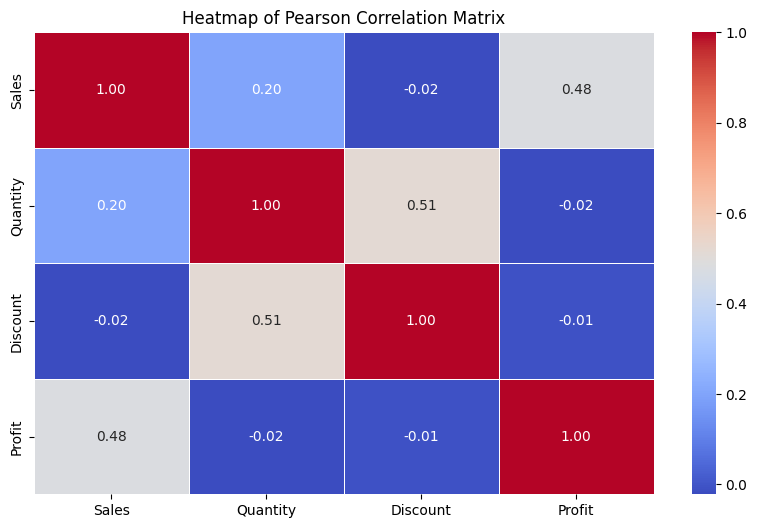

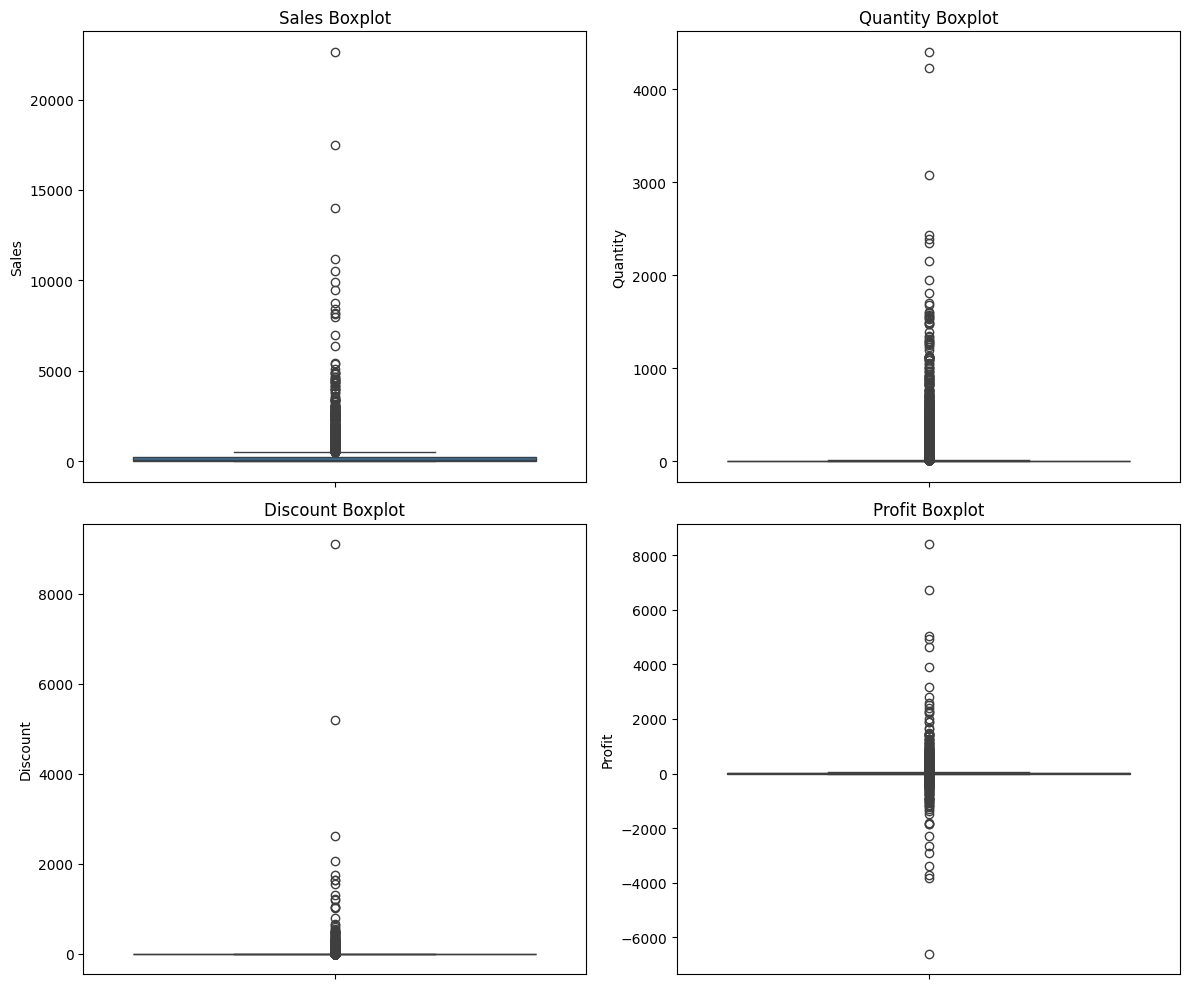

In [22]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Pearson Correlation Matrix")
plt.show()

# Boxplots to visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=df_split["Sales"], ax=axes[0, 0]).set_title("Sales Boxplot")
sns.boxplot(y=df_split["Quantity"], ax=axes[0, 1]).set_title("Quantity Boxplot")
sns.boxplot(y=df_split["Discount"], ax=axes[1, 0]).set_title("Discount Boxplot")
sns.boxplot(y=df_split["Profit"], ax=axes[1, 1]).set_title("Profit Boxplot")
plt.tight_layout()
plt.show()
